## Credit Card Fraud Detection Project

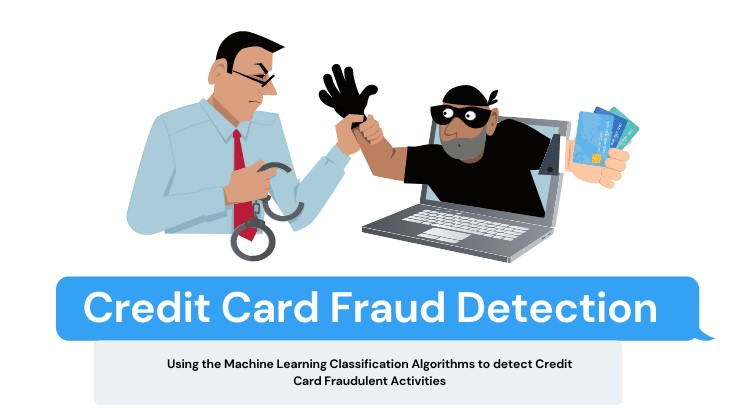

# Importing The Libraries

In [69]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [70]:
# loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv(r"D:\CC-Project ML\creditcard.csv")

In [71]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [72]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [73]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [74]:
credit_card_data['Class'].unique()

array([0, 1], dtype=int64)

In [75]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

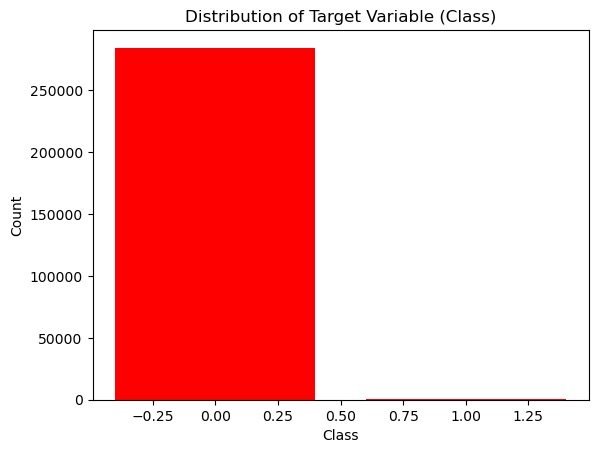

In [83]:
#Count of the occurances of each  class
class_counts = credit_card_data['Class'].value_counts()


plt.bar(class_counts.index, class_counts.values,color='r')

plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Target Variable (Class)')

plt.show()

In [84]:
import seaborn as sns

<Axes: ylabel='count'>

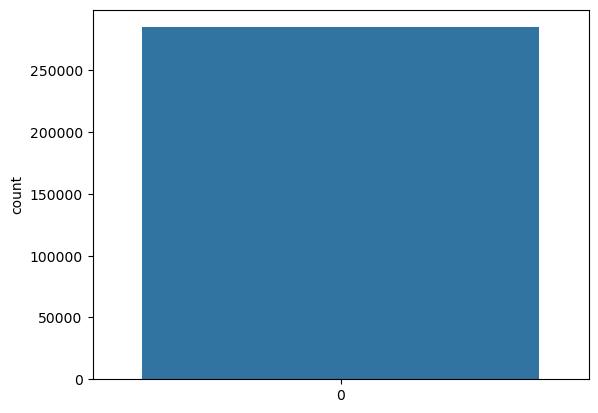

In [86]:
# Count the target class
sns.countplot(credit_card_data['Class'])

# This Dataset is highly unblanced

0 --> Normal Transaction

1 --> fraudulent transaction

In [43]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [44]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [45]:
# statistical measures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [46]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [47]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Under-Sampling


Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

Number of Fraudulent Transactions --> 492

In [48]:
legit_sample = legit.sample(n=492)

Concatenating two DataFrames

In [50]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [51]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
100526,67541.0,-0.708787,0.533013,0.635213,0.476484,1.931433,4.673552,-0.442462,1.132868,0.693644,...,-0.426104,-0.747617,-0.040966,1.001714,-0.200138,-0.528274,-0.479793,-0.371061,13.95,0
80832,58674.0,1.152464,0.037521,1.305786,1.334996,-0.898342,-0.182181,-0.492721,0.034502,0.745575,...,-0.051080,0.105850,-0.017531,0.404254,0.447673,-0.411661,0.078765,0.040353,9.99,0
179591,124148.0,0.574116,-2.754363,-1.711724,0.431446,-0.113910,2.039622,0.132769,0.434651,0.850718,...,0.058383,-1.200688,-0.091776,-0.942783,-1.027799,0.155117,-0.134516,0.050351,689.64,0
4560,3883.0,-0.608519,1.230479,2.353460,0.914617,0.579920,-0.209272,1.126411,-0.830221,1.191867,...,-0.258092,0.079570,-0.289618,0.360600,0.287978,-0.441417,-0.655683,-0.597949,3.75,0
154715,102662.0,1.786333,0.146965,0.529377,4.050339,-0.172193,1.175376,-0.851458,0.349407,1.200424,...,-0.359305,-0.661206,0.342955,-0.606517,-0.511413,-0.331442,-0.002274,-0.045036,18.96,0


In [52]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [53]:
new_dataset['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [54]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,97694.987805,0.092649,-0.129991,-0.054664,0.024979,0.052010,0.086234,0.014872,-0.042594,0.054790,...,-0.054845,-0.022698,0.018833,-0.005956,0.007385,0.028740,0.007221,-0.013982,-0.004161,98.925650
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Splitting the data into Features & Targets

In [55]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [56]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
100526,67541.0,-0.708787,0.533013,0.635213,0.476484,1.931433,4.673552,-0.442462,1.132868,0.693644,...,0.075695,-0.426104,-0.747617,-0.040966,1.001714,-0.200138,-0.528274,-0.479793,-0.371061,13.95
80832,58674.0,1.152464,0.037521,1.305786,1.334996,-0.898342,-0.182181,-0.492721,0.034502,0.745575,...,-0.071201,-0.051080,0.105850,-0.017531,0.404254,0.447673,-0.411661,0.078765,0.040353,9.99
179591,124148.0,0.574116,-2.754363,-1.711724,0.431446,-0.113910,2.039622,0.132769,0.434651,0.850718,...,1.120314,0.058383,-1.200688,-0.091776,-0.942783,-1.027799,0.155117,-0.134516,0.050351,689.64
4560,3883.0,-0.608519,1.230479,2.353460,0.914617,0.579920,-0.209272,1.126411,-0.830221,1.191867,...,0.313879,-0.258092,0.079570,-0.289618,0.360600,0.287978,-0.441417,-0.655683,-0.597949,3.75
154715,102662.0,1.786333,0.146965,0.529377,4.050339,-0.172193,1.175376,-0.851458,0.349407,1.200424,...,-0.332078,-0.359305,-0.661206,0.342955,-0.606517,-0.511413,-0.331442,-0.002274,-0.045036,18.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [58]:
Y

100526    0
80832     0
179591    0
4560      0
154715    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64

# Split the data into Training data & Testing Data

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [60]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


# Model Training

In [61]:
model = LogisticRegression()

In [62]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

LogisticRegression()

# Model Evaluation

In [63]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [64]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9301143583227446


In [65]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [66]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9137055837563451


In [87]:
# SVC

In [88]:
# Support vector classifier
from sklearn.svm import SVC
svc_classifier = SVC()
svc_classifier.fit(X_train, Y_train)
Y_pred_scv = svc_classifier.predict(X_test)
accuracy_score(Y_test, Y_pred_scv)

0.5634517766497462

In [89]:
# K – Nearest Neighbor Classifier

In [90]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier.fit(X_train, Y_train)
Y_pred_knn = knn_classifier.predict(X_test)
accuracy_score(Y_test, Y_pred_knn)

0.649746192893401

In [91]:
# Naive Bayes Classifier

In [94]:
# Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, Y_train)
Y_pred_nb = nb_classifier.predict(X_test)
accuracy_score(Y_test, Y_pred_nb)

0.8781725888324873

In [95]:
# Decision Tree Classifier

In [96]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 51)
dt_classifier.fit(X_train, Y_train)
Y_pred_dt = dt_classifier.predict(X_test)
accuracy_score(Y_test, Y_pred_dt)

0.8984771573604061

In [97]:
# Random Forest Classifier

In [98]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 51)
rf_classifier.fit(X_train, Y_train)
Y_pred_rf = rf_classifier.predict(X_test)
accuracy_score(Y_test, Y_pred_rf)

0.9137055837563451

In [99]:
# Adaboost Classifier

In [100]:
from sklearn.ensemble import AdaBoostClassifier
adb_classifier = AdaBoostClassifier(DecisionTreeClassifier(criterion = 'entropy', random_state = 200),
                                    n_estimators=2000,
                                    learning_rate=0.1,
                                    algorithm='SAMME.R',
                                    random_state=1,)
adb_classifier.fit(X_train, Y_train)
Y_pred_adb = adb_classifier.predict(X_test)
accuracy_score(Y_test, Y_pred_adb)

0.8984771573604061

In [101]:
# XGBoost Classifier

In [102]:
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, Y_train)
Y_pred_xgb = xgb_classifier.predict(X_test)
accuracy_score(Y_test, Y_pred_xgb)

0.9137055837563451

In [110]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


# Confusion Matrix

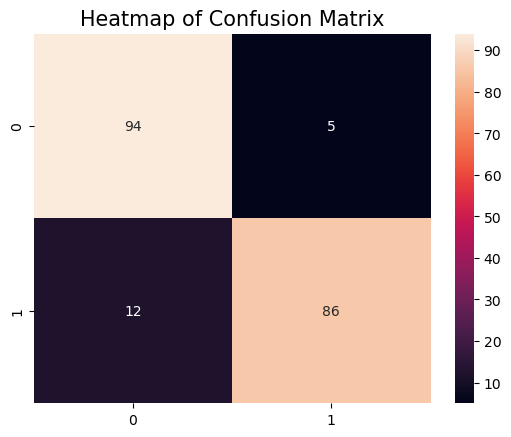

In [114]:
cm = confusion_matrix(Y_test, Y_pred_xgb)
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

# Classification Report of Model

In [116]:
print(classification_report(Y_test, Y_pred_xgb))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92        99
           1       0.95      0.88      0.91        98

    accuracy                           0.91       197
   macro avg       0.92      0.91      0.91       197
weighted avg       0.92      0.91      0.91       197

